# Know The Data

This tutorial aims to give you an introduction to the dataset used throughout the project. 
The dataset is provided by the case western university on following [website](https://csegroups.case.edu/bearingdatacenter/pages/download-data-file).



We will start by setting number of observations we want a single instance to have. The default configuration is 2048 observation. This configuration can be changed in the config.py file. 

As it is stated in the oficcial website of the case western dataset that the data was samples on a rate of 48kHz, we know that means that one instance of 2048 observations corresponds to 40.26 ms. 

In [2]:
import config as cf

sampling_rate = cf.samples['sampling_rate']
observations_num = cf.samples['observations_num']
observations_num, sampling_rate

(2048, 48000)

## Load Datafiles

Next, we will load the first data file. Every datafile is named by the following notation: 

 fault_severity_mode

The available modes are 0, 1, 2, 3. The faults are either "inner", "ball" or "outer". And severities are 7, 14 or 21 inches.  

In all of the tutorials and experiments we only consider the 0 mode. 


In [3]:
from scipy.io import loadmat

data = loadmat('../data/normal_0.mat')

# find the key that starts with X which indicates the actual data i.e permit
# headers and so on, first one of these represents the time_series drive end accelerometer data

data = [value for key, value in data.items() if key.startswith('X')]
data = data[0]

## Read an instance of 2048 observations

The data container now holds all of the time series information of the no fault data of mode 0. To visulaize one instance of the data, we need to get the first 2048 observations of the variable data.

In [4]:
import numpy as np

data_normal = data[0:observations_num]

# Every value is in a list, that is why we need to flatten it first

flat_data_normal = [item for sublist in data_normal for item in sublist]
data_normal = np.array(flat_data_normal)
print("The instance has : " + str(len(data_normal)) + " observations")
data_normal

The instance has : 2048 observations


array([ 0.05319692,  0.08866154,  0.09971815, ...,  0.00020862,
       -0.02190462, -0.07113785])

## Visualize a data instance


The resulting instance is just a list of values that don't make a lot of sense. To get more intuition about the data, it is nice to visulaize it. We will plot the acceleration values on the y-axis and on the x-axis the corresponding time step values. Remember that one time step is about 0.02 ms.

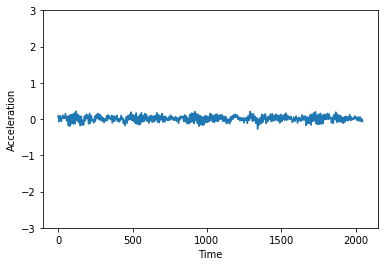

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(len(data_normal)), data_normal, linestyle='solid')

ax.set_ylim([-3,3])

ax.set_xlabel('Time')
ax.set_ylabel('Acceleration')

plt.show()

## Visualize the fourier transform

Another important step is to visualize the observations in the frequency domain. Every signal is combined of a number of sinusoids. Using the fourier transform, we can extract the contributing frequencies and how big their contribution is. These frequencies contain valubale information, that we will later on use to detect faults in the machinery.

The sklearn fft function returns the fourier transform of the signal. fftfreq returns the corresponding frequencies. 

To visulaize the fourier transform, we plot the amplitudes from fft on the y-axis and the corresponding frequencies on the x-axis. 

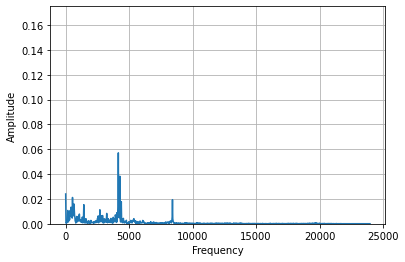

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

instance_f = fft(data_normal)
T = 1/sampling_rate
yf = instance_f
xf = fftfreq(observations_num, T)[:observations_num//2]
plt.plot(xf,  2.0/observations_num*np.abs(yf[0:observations_num//2]))

plt.ylim([0,0.175])

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid()


## Now, Let's experiment!


Let's visualize another instance, but this time with an outer race fault of severity 21 inch. 

In [21]:
import numpy as np
from scipy.io import loadmat

data = loadmat('../data/outer_21_0.mat')

# find the key that starts with X which indicates the actual data i.e permit
# headers and so on, first one of these represents the time_series drive end accelerometer data

data = [value for key, value in data.items() if key.startswith('X')]
data = data[0]

data_outer = data[0:observations_num]

# Every value is in a list, that is why we need to flatten it first

flat_data_outer = [item for sublist in data_outer for item in sublist]
data_outer = np.array(flat_data_outer)
print("The instance has : " + str(len(data_outer)) + " observations")
data_outer

The instance has : 2048 observations


array([ 0.01335467, -0.345552  , -0.693608  , ...,  0.147736  ,
        0.16943733,  0.177784  ])

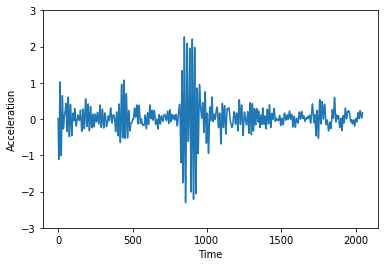

In [22]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

fig, ax = plt.subplots()

ax.plot(range(len(data_outer)), data_outer, linestyle='solid')
ax.set_ylim([-3,3])

ax.set_xlabel('Time')
ax.set_ylabel('Acceleration')

plt.show()

 The signal looks significantly different from a no fault signal. Isn't that amazing?
 
 This says a lot about the shift in vibrations' amplitude and frequency when a fault occurs. We can expect that this shift to increase the more severe the fault is.
 
 How about the frequency domain? Does it also get affected by the occurence of a fault?

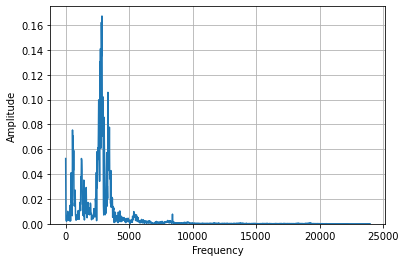

In [35]:
import numpy as np

instance_f = fft(data_outer)
T = 1/sampling_rate
yf = instance_f
xf = fftfreq(observations_num, T)[:observations_num//2]
plt.plot(xf, 2.0/observations_num * np.abs(yf[0:observations_num//2]))
plt.ylim([0,0.175])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

plt.grid()


The answer is: Yes! The maximum amplitude is way less and there is a significant shift in the contributing frequencies. 

Let's try it out one last time with an instance of an inner race fault and severity of 7 inch.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('../data/inner_7_0.mat')

# find the key that starts with X which indicates the actual data i.e permit
# headers and so on, first one of these represents the time_series drive end accelerometer data

data = [value for key, value in data.items() if key.startswith('X')]
data = data[0]

data_inner = data[0:observations_num]

# Every value is in a list, that is why we need to flatten it first

flat_data_inner = [item for sublist in data_inner for item in sublist]
data_inner = np.array(flat_data_inner)
print("The instance has : " + str(len(data_inner)) + " observations")
data_inner


The instance has : 2048 observations


array([ 0.010016  , -0.023788  , -0.00792933, ...,  0.68067067,
        0.92606267,  1.069208  ])

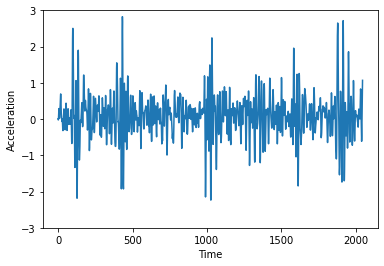

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(len(data_inner)), data_inner, linestyle='solid')
ax.set_ylim([-3,3])

ax.set_xlabel('Time')
ax.set_ylabel('Acceleration')

plt.show()

## What about feature extraction? 

Don't worry to extract the featuresof the signal, just set the desired features to 1 in the config.features dictionary in the config.py file. The available features are:

1. mean
2. rms
3. skewness
4. kurtosis
5. fourier max
6. fourier mean
7. p_2
8. fourier centroid

To find out which features are set to one in the configurations try out the following:


In [69]:
import feature_extraction as fe

fe.get_feature_names()

['mean', 'rms', 'skewness', 'kurtosis', 'foureir_max']

And now let's extract the features of the inner race fault instance.

In [68]:
import pandas as pd
import feature_extraction as fe

features = fe.extract_features(data_inner)
names = fe.get_feature_names()

pd.DataFrame([features], columns = names)

mean       rms  skewness  kurtosis  foureir_max
0  0.086707  0.592672  0.207567  3.119598     0.235341

That was it! We hope you have a better intuition about the data.
Please check the next tutorials to learn more about our project: 

[My First Hierarchical Classifier](https://gitlab.com/aliyahammad95/condition-monitoring/-/blob/master/src/My%20First%20Hierarchical%20Classifier.ipynb)

[Q Learning](https://gitlab.com/aliyahammad95/condition-monitoring/-/blob/master/src/Q%20learning.ipynb)